**DATASET LINK** : https://www.kaggle.com/mirichoi0218/insurance

**GOAL** : Can you accurately predict insurance costs?


referal:

https://www.kaggle.com/sudhirnl7/linear-regression-tutorial/data

https://www.kaggle.com/hellbuoy/carprice-prediction-mlr-rfe-vif#Step-1-:-Reading-and-Understanding-the-Data

https://homepage.divms.uiowa.edu/~luke/classes/STAT4580/catone.html


# **DATA PREPROCESSING**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Insights**:

dependent variable name - charges

numerical values - [age,bmi,children,charges]

categorical values - [sex,smoker,region]

## 1. check for null values:

In [ ]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Insights**

so we can see that we dont have any null values


## 2. check for any duplicate data

In [ ]:


df.loc[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
df.drop(axis = 0,index = 581,inplace = True)

In [ ]:
df.count()

age         1337
sex         1337
bmi         1337
children    1337
smoker      1337
region      1337
charges     1337
dtype: int64

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3. Encodng the data


In [ ]:
# now lets first encode categorical data to gain insights

# we will use labelencoder to do so 


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#sex
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)

# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)

#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)



In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## 4.Visualizing the data

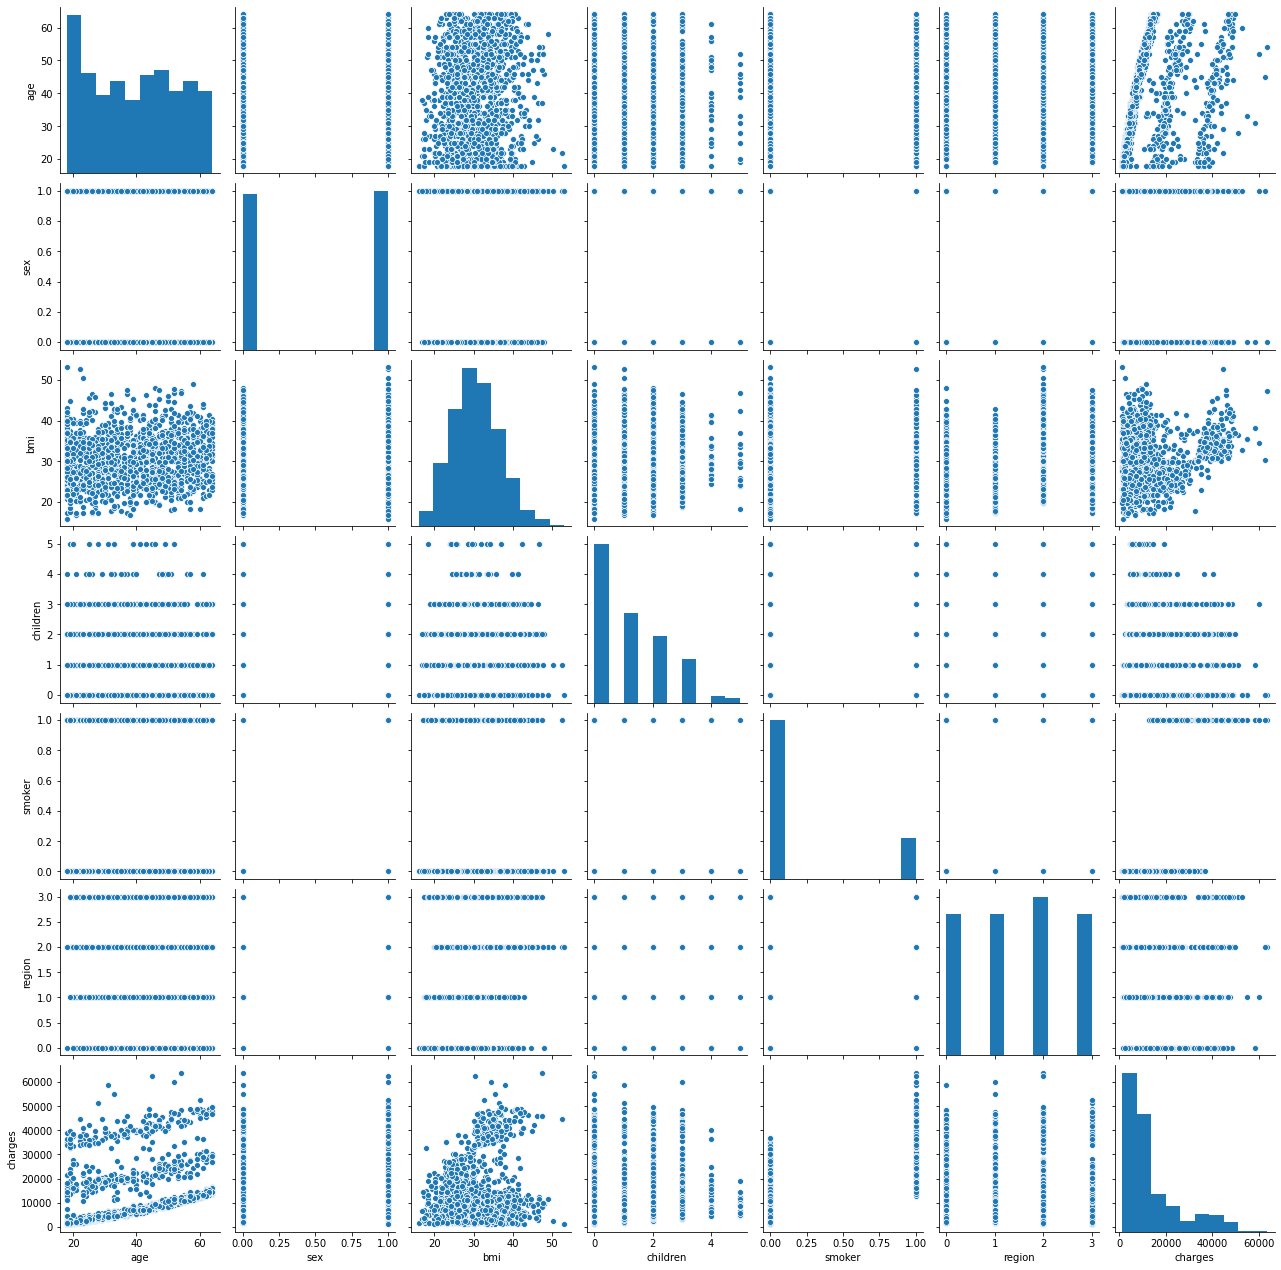

In [ ]:
# Now lets plot a pairplot to see relations of independent variables with the dependent variable


ax = sns.pairplot(df)


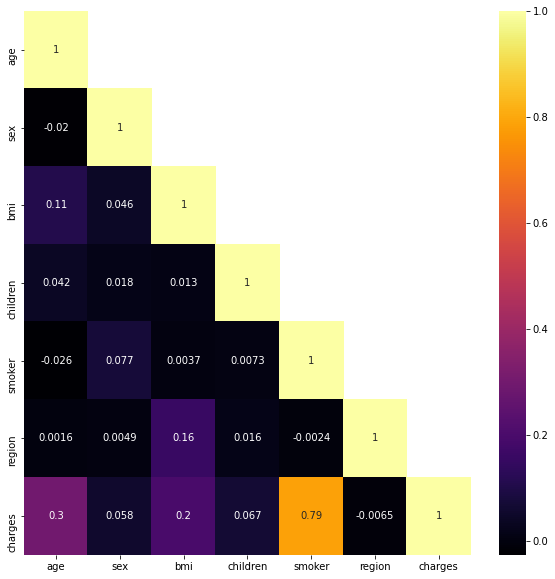

In [ ]:
# now lets plot a correlation matrix and see if we can derive any strong corelation from there

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='inferno',mask=np.triu(df.corr(),k=1))

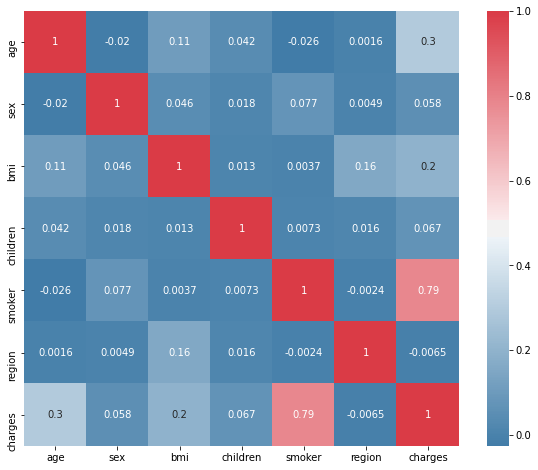

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,annot= True, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap='inferno'),
            square=True, ax=ax)


**Insights**

We can see that the being a smoker or not has a high corelation with charges

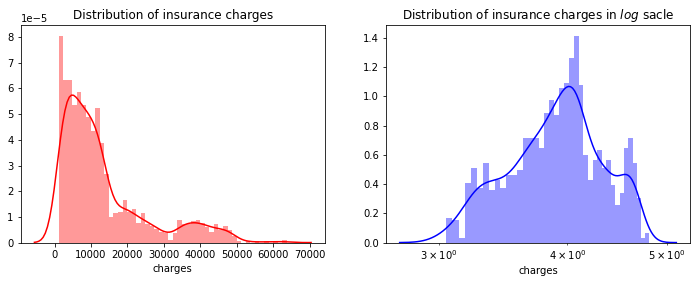

In [ ]:
# now lets examine our dependent variable. Lets see its distribution:

f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

**Insight**

 we can see that it is not a gaussian distribution but when we take a log scale, it almost becomes a gaussian distribution

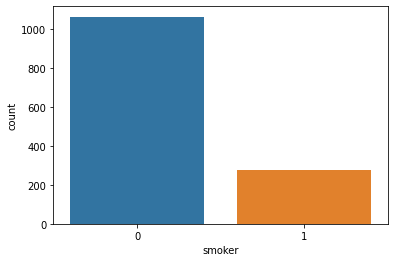

In [ ]:
# lets check how skewed the smokers data is:
sns.countplot(df['smoker'])

<Figure size 720x432 with 0 Axes>

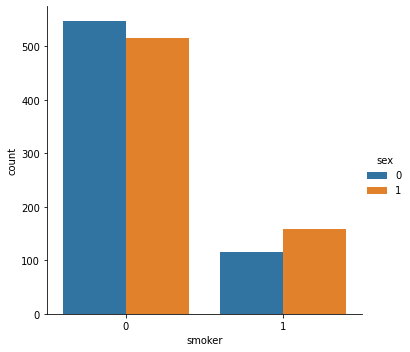

In [ ]:
plt.figure(figsize = (10, 6))
sns.catplot(x = 'smoker', hue = 'sex',kind="count", data = df)
plt.show()

**Insights**

Women = 0 and men = 1

smoker = 1 and non smoker = 0

So we can see that there are more men smokers then female smokers

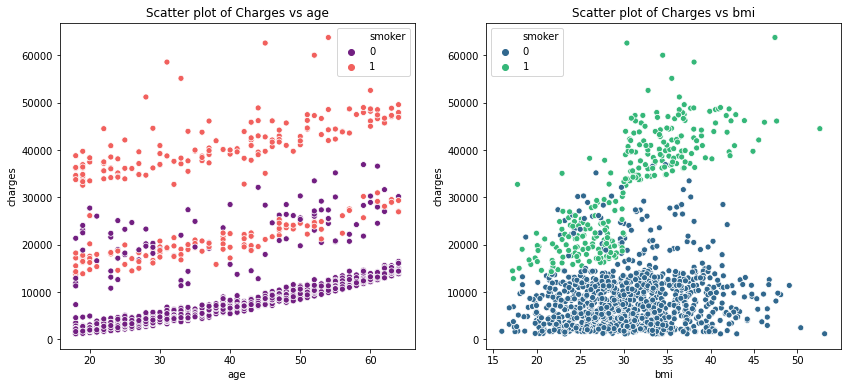

In [ ]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

## 5.Checking for outliers


 ### ***5.a. NUMERICAL DATA***


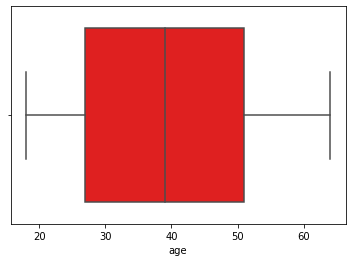

In [ ]:

sns.boxplot(df['age'],color='red')

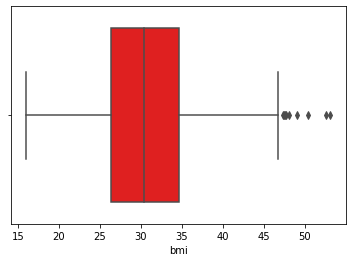

In [ ]:
sns.boxplot(df['bmi'],color='red')
# we have a few outliers here

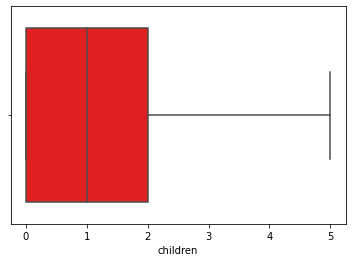

In [ ]:
sns.boxplot(df['children'],color='red')

**Joint plots to see relationship of numerical variables with dependent variable**

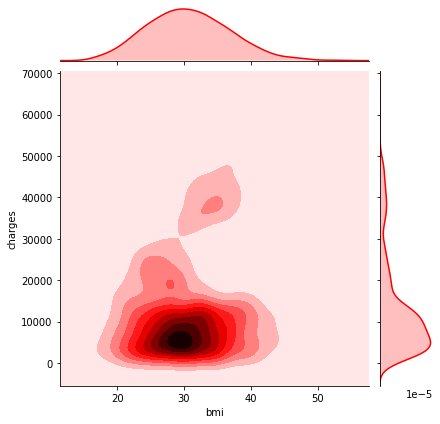

In [ ]:
sns.jointplot(x="bmi",y="charges",data= df,kind='kde',color='red')

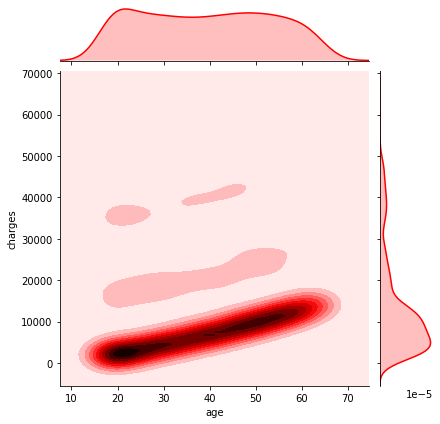

In [ ]:
sns.jointplot(x="age",y="charges",data= df,kind='kde',color='red')

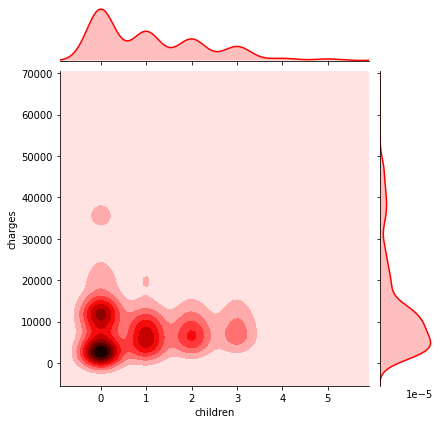

In [ ]:
sns.jointplot(x="children",y="charges",data= df,kind='kde',color='red')

### ***5.b. Categorical Data***

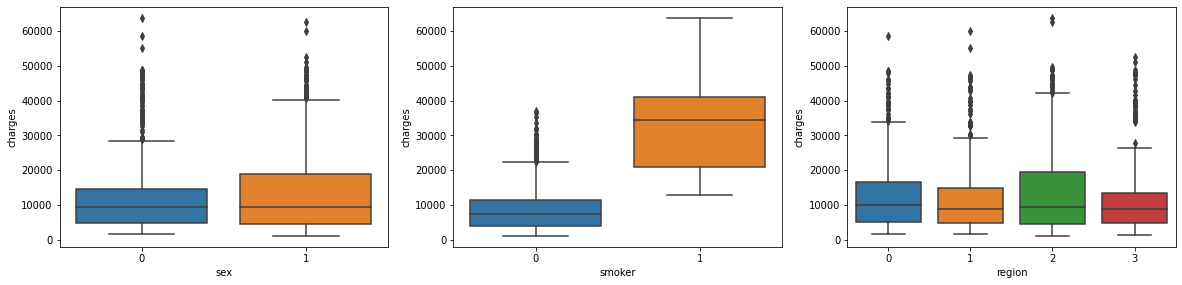

In [ ]:
#Visualizing Categorical Variables
#Boxplot of all the categorical variables

plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'sex', y = 'charges', data = df)

plt.subplot(3,3,2)
sns.boxplot(x = 'smoker', y = 'charges', data = df)


plt.subplot(3,3,3)
sns.boxplot(x = 'region', y = 'charges', data = df)

plt.show()

**Insights**

1. Charges for smokers is higher than charges for non smokers

2. We can see that charges in region 2 are higher than other 
   regions so we can try to plot a smoker vs region chart to see if this particular region has high no. of smokers 
   



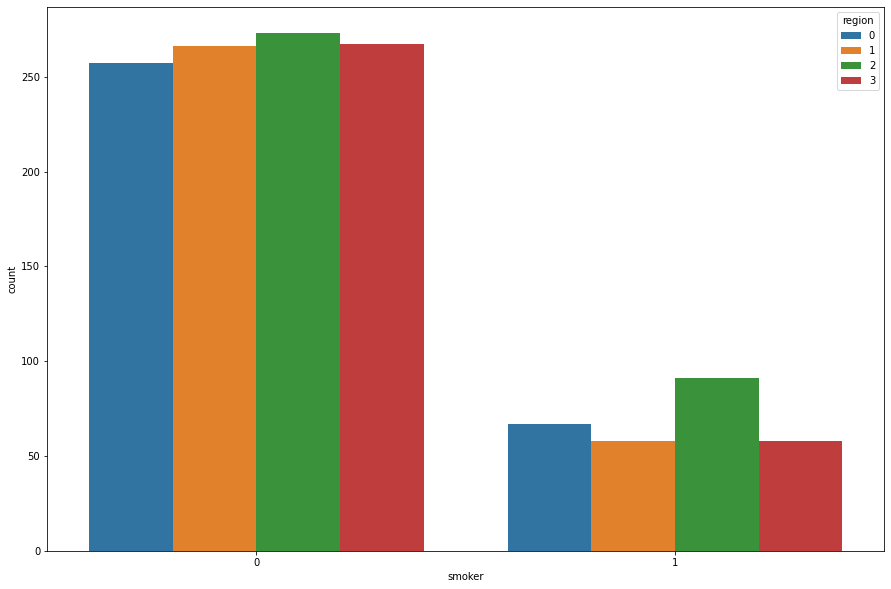

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(x = 'smoker',hue = "region", data = df)

In [ ]:
"""
Z-score:
This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean.
If the z score of a data point is more than 3/-3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.
"""

from scipy import stats
z = np.abs(stats.zscore(df))
threshold = 3
print(np.where(z > 3)) # The first array contains the list of row numbers and second array respective column numbers

#Removing outliers
data_without_outliers = df[(z < 3).all(axis=1)]

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        639,  818,  846,  876,  931,  936,  968,  983, 1046, 1084, 1115,
       1129, 1145, 1229, 1244, 1271, 1299, 1316]), array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 6, 6, 3, 3, 6, 2]))


In [ ]:
data_without_outliers.shape

(1308, 7)

In [ ]:
data_without_outliers.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## 5. Box Cox Transformation or Log Transformtion for dependent variable

A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn't normal, applying a Box-Cox means that you are able to run a broader number of tests.

Log transformation does the same thing

As we saw above, our dependent variable charges is not a normal distribution and hence we apply box cox transformatioin


In [ ]:
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(df['charges'],alpha=0.05)

#df['charges'] = y_bc  
# it did not perform better for this model, so log transform is used
ci,lam

# This did not perform good so we will use log transformation on the dependent variable

# df['charges'] = np.log(df['charges'])

((-0.011576269777122257, 0.09872104960017168), 0.043516942579678274)

# **BUILDING THE MODEL**

## 1. Preparing the data

In [ ]:
x = data_without_outliers.iloc[:,:-1].values
y = data_without_outliers.iloc[:,-1].values


# adding the bias variable
x_new = np.concatenate((np.ones((len(x), 1), dtype=int), x), axis=1)
print(x_new.shape)

# y = np.log(y)
print(y)

(1308, 7)
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [ ]:
# splitting the data

from sklearn.model_selection import train_test_split
'''
x = data_without_outliers.drop(['charges'], axis = 1)

y = data_without_outliers.charges
y = y.values
'''

x_train,x_test,y_train,y_test = train_test_split(x_new ,y, random_state = 0)


y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)



In [ ]:
# adding a polynomial variable. squaring bmi and adding it a as new param

temp = x_train[:,3] ** 2
x_train = np.concatenate((x_train, temp.reshape(len(temp), 1)), axis = 1)


temp = x_test[:,3] ** 2
x_test = np.concatenate((x_test, temp.reshape(len(temp), 1)), axis = 1)

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(981, 8) (981, 1) (327, 8) (327, 1)


In [ ]:
# NOW LETS IMPLEMENT FEATURE SCALING ON TRAINING DATA FOR ACCURATE RESULTS

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train[:,[1, 3, 7]] = sc.fit_transform(x_train[:,[1, 3, 7]])
x_test[:,[1, 3, 7]] = sc.transform(x_test[:,[1, 3, 7]])


# x_train[:,[1, 3, 6]] = sc.fit_transform(x_train[:,[1, 3, 6]])
# x_test[:,[1, 3, 6]] = sc.transform(x_test[:,[1, 3, 6]])



In [ ]:
theta = np.random.normal(size=(x_new.shape[1],1))
theta.shape
print(x_train.shape)
print(y_train.shape)

(981, 8)
(981, 1)


## 2. Training the model

In [ ]:
def costfunc(m,h,y):
    '''
    m = no. of training examples
    h = hypothesis matrix of all training examples
    y = dependent variable matrix for all training examples

    '''
    J = float((1/(2*m)) * sum(((h - y) ** 2)))  
    return J


In [ ]:
def gradient_descent(m,x,y,theta,alpha,h):

    ''' 
    theta = 7x1
    x = 1308x1
    h = 1308x1
    y = 1308x1

    formula = theta = theta - (alpha/m) * (h - y) * x

    adjusting equation according to the desired dimensions, we get

    formula = theta = theta - (alpha/m) * [(h - y)^T * x]^T
    '''


    theta = theta - ((alpha/m) * (np.matmul((h - y).T, x))).T
    return theta



In [ ]:
# LINEAR REGRESSION

m = len(x_train)
cost = []
iterations = 10000

theta = np.random.normal(size=(x_train.shape[1],1))
alpha = 0.0015
for i in range(iterations):
      h = np.matmul(x_train, theta)
      h.shape
      J = costfunc(m,h,y_train)
      cost.append(J)
      theta = gradient_descent(m, x_train, y_train, theta, alpha, h)



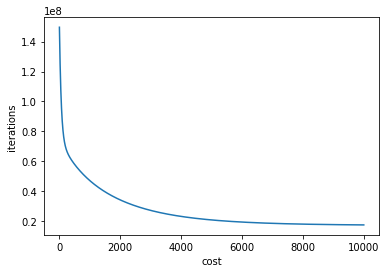

In [ ]:
plt.plot(list(range(iterations)),cost)

plt.xlabel("cost")
plt.ylabel("iterations")
plt.show()

In [ ]:
print(theta)

[[ 8292.67085735]
 [ 3486.14615974]
 [  489.51493981]
 [ 1410.87352687]
 [  636.20207881]
 [21079.35798202]
 [ -302.59805706]
 [  407.90722431]]


In [ ]:
y_pred = np.matmul(x_test, theta)
print(y_pred.shape)

(327, 1)


In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_pred, y_test))
print(metrics.mean_squared_error(y_pred, y_test))
print(np.sqrt(metrics.mean_squared_error(y_pred, y_test)))

4336.549903451291
35194826.01525923
5932.522736177185


In [ ]:
print(np.concatenate((y_pred, y_test), axis = 1))

[[29570.74614485 21472.4788    ]
 [17552.18524515 14418.2804    ]
 [10309.98785354  5972.378     ]
 [ 7672.93695761  4433.9159    ]
 [12290.71232954  9583.8933    ]
 [ 7006.77181887  5272.1758    ]
 [ 4212.63012699  3756.6216    ]
 [ 1296.6497174   1615.7667    ]
 [ 8298.00431471  4462.7218    ]
 [34303.98238276 28101.33305   ]
 [34041.79200276 42760.5022    ]
 [12726.45201888  8798.593     ]
 [ 7447.8172867   5969.723     ]
 [11508.76875682 23045.56616   ]
 [34597.47646824 43921.1837    ]
 [ 4174.81740136  3213.62205   ]
 [ 6463.12594122  3659.346     ]
 [ 1780.95572272  2198.18985   ]
 [ 5275.69421971  4883.866     ]
 [14880.90845094 13974.45555   ]
 [ 6214.73283771  1146.7966    ]
 [ 8720.62682963  4518.82625   ]
 [ 5056.89009795  2904.088     ]
 [25608.57465558 34303.1672    ]
 [ 7269.89252455  5261.46945   ]
 [10320.65502103  7954.517     ]
 [11184.25482951 11455.28      ]
 [15585.58985875 12363.547     ]
 [ 6177.54396267  5383.536     ]
 [ 5926.37978272  3943.5954    ]
 [ 8524.93

## 3. Using polynomial regression to check its performance

In [ ]:
'''
the data is not designed to fit linear regression so now lets try to fit 
polynomial regression using sklearn and check the accuracy
'''

'\nthe data is not designed to fit linear regression so now lets try to fit \npolynomial regression using sklearn and check the accuracy\n'

In [ ]:
x = data_without_outliers.iloc[:,:-1]
y = data_without_outliers.iloc[:,-1]

# y = np.log(y)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


poly = PolynomialFeatures(degree = 4)
x_poly = poly.fit_transform(x)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_poly,y, random_state = 0)

sc = StandardScaler()

# x_train[:,[1, 3, 7]] = sc.fit_transform(x_train[:,[1, 3, 7]])
# x_test[:,[1, 3, 7]] = sc.transform(x_test[:,[1, 3, 7]])


x_train[:,[1, 3, 6]] = sc.fit_transform(x_train[:,[1, 3, 6]])
x_test[:,[1, 3, 6]] = sc.transform(x_test[:,[1, 3, 6]])


regressor = LinearRegression()

regressor.fit(x_train, y_train)

sk_theta = [regressor.intercept_]+list(regressor.coef_)
# print(np.array.reshape(sk_theta[:],1))

for x in sk_theta:
  print(x)

185282.05282941004
-0.0010389512748667084
72605.5037073453
4188.115886691324
7307.213195797782
-28610.063364794383
46770.26019870411
-3673.911656182068
-145.51825111999895
-125.00298098377425
-140.57061803992448
195.3241582515765
-322.7150526804049
57.74505321823032
4188.11558517541
-404.45173183681584
408.23460752075465
-1307.297536331866
-2234.783955114369
-12.54652607049995
2197.5824450281325
-6668.336665668891
784.8377956386988
9067.046446271179
-2280.375096718638
-2928.3840803931266
46770.26021476691
5664.314035978285
-2087.6128670716325
2.249704516642224
2.585282548288741
1.0573247355018
2.279133103102498
-0.08820767298915944
-3.5953956184135905
-125.00293871182713
12.829816692110796
5.043144487026439
-66.33127897691662
-11.545364293534703
2.826441623188657
-20.871442972337945
42.499669630482515
0.8026851767368441
-40.70390100277575
195.95203972669304
-87.75626594559975
-322.7151330486774
-79.27047396335857
70.74517020200003
4188.115580567142
-404.45174591302276
408.2345927310067

In [ ]:
print(regressor.score(x_test,y_test))

0.8618969772624014
